# Pytorch regression _3.7_ [BikeSharing.csv]
# 29_03_2021 
Work on diagnostic systems.
The tank prototype can really be checked in combat conditions!

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
import torch

I'm starting a GPU graphics card

<span style="color:green"> Odpalam karte graficzną GPU

In [2]:
#device = torch.device('cpu') # obliczenia robie na CPU
device = torch.device('cuda') # obliczenia robie na GPU

In [3]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/3/BikeSharing.csv')
print(df.shape)
df.head(3)

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


cnt: count of total rental bikes including both casual and registered



I fill all holes with values out of range

<span style="color:green"> Wypełniam wszystkie dziury wartościami z poza zakresu

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
CORREL =df.corr()
sns.heatmap(CORREL, annot=True, cbar=False, cmap="coolwarm")
plt.title('Macierz korelacji ze zmienną wynikową y', fontsize=20)

Text(0.5, 1, 'Macierz korelacji ze zmienną wynikową y')

Text(0, 0.5, 'Zmienne nezależne ciągłe')

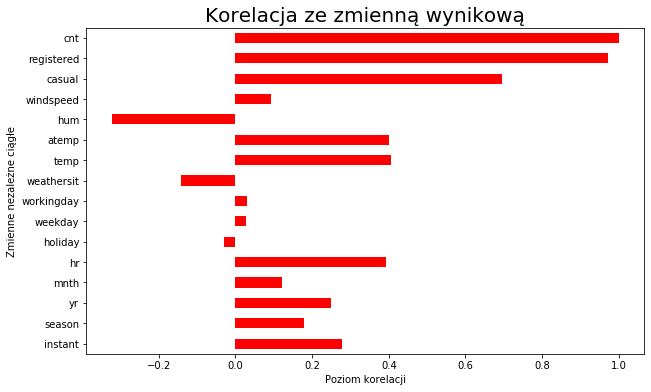

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
CORREL['cnt'].plot(kind='barh', color='red')
plt.title('Korelacja ze zmienną wynikową', fontsize=20)
plt.xlabel('Poziom korelacji')
plt.ylabel('Zmienne nezależne ciągłe')

Variables: 'registered', 'casual' are also results only shown differently, therefore they must be removed from the data.

<span style="color:green"> Zmienne: 'registered','casual' są to też wyniki tylko inaczej pokazane dlatego trzeba je usunąć z danych. 

In [6]:
a,b = df.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df.columns[i]
    r = df[i].isnull().sum()
    h = df[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


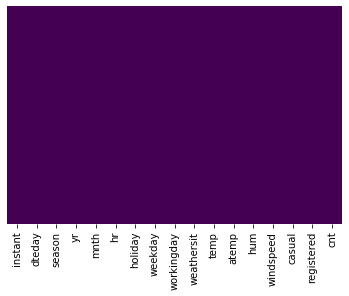

In [7]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
#del df['Unnamed: 15']
#del df['Unnamed: 16']

df = df.dropna(how='any') # jednak je kasuje te dziury

# df.fillna(-777, inplace=True)
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print(df.dtypes)
df.head(3)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### to_datetime

In [10]:
df['dteday'] =  pd.to_datetime(df['dteday'])
df['weekday'] = df.dteday.dt.weekday
df['month'] =df.dteday.dt.month
df['weekofyear'] =df.dteday.dt.weekofyear 

In [11]:
del df['dteday']

In [12]:
print(df.dtypes)
df.head(3)

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
month           int64
weekofyear      int64
dtype: object


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,weekofyear
0,1,1,0,1,0,0,5,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,52
1,2,1,0,1,1,0,5,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,52
2,3,1,0,1,2,0,5,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,52


### Encodes text values

### <span style="color:green"> Koduje wartości tekstowe

In [13]:
import numpy as np

a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------


In [14]:
df.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
month           int64
weekofyear      int64
dtype: object

In [15]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'month', 'weekofyear'],
      dtype='object')

### I'm cutting out an iron test reserve
### <span style="color:green"> Wycinam żelazną rezerwę testową

Wycinam 0.5% procent ostatnich rekordów które będa słuzyły do sprawdzenia zdolności prognostycznych 

In [16]:
R,C =df.shape
F = R*0.005
L = R - F
L

17292.105

In [17]:
df5 = df[df.index>=L]
df2 = df[df.index<L]
print('Zbiór super testowy df5:',df5.shape)
print('df2:                    ',df2.shape) 

Zbiór super testowy df5: (86, 18)
df2:                     (17293, 18)


### I specify what is X and what is y

### <span style="color:green"> Określam co jest X a co y

In [18]:
X = df2.drop(['cnt','registered','casual'],1)
y = df2['cnt']

In [19]:
X_SuperT = df5.drop(['cnt','registered','casual'],1)
y_SuperT = df5['cnt']

<span style="font-size: 110%;background:##ffe599">Wynik (ilość rowerów wypożyczonych) przed skalowaniem</span>  

In [20]:
y[:5]

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

<span style="font-size: 110%;background:##ffe599">Zmienne opisujące przed skalowaniem

In [21]:
X[:5]

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,month,weekofyear
0,1,1,0,1,0,0,5,0,1,0.24,0.2879,0.81,0.0,1,52
1,2,1,0,1,1,0,5,0,1,0.22,0.2727,0.80,0.0,1,52
2,3,1,0,1,2,0,5,0,1,0.22,0.2727,0.80,0.0,1,52
3,4,1,0,1,3,0,5,0,1,0.24,0.2879,0.75,0.0,1,52
4,5,1,0,1,4,0,5,0,1,0.24,0.2879,0.75,0.0,1,52


### Scaling (normalization) of the X value

X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

### <span style="color:green"> Skalowanie (normalizacja) wartości X

<span style="color:green"> X nigdy nie powinien być zbyt duży. Idealnie powinien być w zakresie [-1, 1]. Jeśli tak nie jest, należy znormalizować dane wejściowe.

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X.std(), decimals=2), np.round(X.mean(), decimals=2))

1.0 0.0


In [23]:
y.value_counts()

5      260
6      235
4      231
3      221
2      207
      ... 
725      1
709      1
661      1
629      1
887      1
Name: cnt, Length: 869, dtype: int64

In [24]:
y = (y / 100)  # max test score is 100
#print(y.head(3))
print(np.round(y.std(), decimals=2), np.round(y.mean(), decimals=2))

1.82 1.9


### Creates
### <span style="color:green"> Tworzymy tensor torch

In [25]:
import numpy as np

#X = X.values       #- jak była normalizacja to to nie działa
X = torch.tensor(X)
print(X[:3])

tensor([[-1.7320, -1.3663, -1.0002, -1.6087, -1.6694, -0.1726,  0.9965, -1.4710,
         -0.6633, -1.3437, -1.1028,  0.9456, -1.5557, -1.6087,  1.7030],
        [-1.7318, -1.3663, -1.0002, -1.6087, -1.5247, -0.1726,  0.9965, -1.4710,
         -0.6633, -1.4477, -1.1914,  0.8938, -1.5557, -1.6087,  1.7030],
        [-1.7316, -1.3663, -1.0002, -1.6087, -1.3801, -0.1726,  0.9965, -1.4710,
         -0.6633, -1.4477, -1.1914,  0.8938, -1.5557, -1.6087,  1.7030]],
       dtype=torch.float64)


In [26]:
X = X.type(torch.FloatTensor)
print(X[:3])

tensor([[-1.7320, -1.3663, -1.0002, -1.6087, -1.6694, -0.1726,  0.9965, -1.4710,
         -0.6633, -1.3437, -1.1028,  0.9456, -1.5557, -1.6087,  1.7030],
        [-1.7318, -1.3663, -1.0002, -1.6087, -1.5247, -0.1726,  0.9965, -1.4710,
         -0.6633, -1.4477, -1.1914,  0.8938, -1.5557, -1.6087,  1.7030],
        [-1.7315, -1.3663, -1.0002, -1.6087, -1.3801, -0.1726,  0.9965, -1.4710,
         -0.6633, -1.4477, -1.1914,  0.8938, -1.5557, -1.6087,  1.7030]])


In [27]:
y = y.values   # tworzymy macierz numpy - jak była normalizacja to to nie działa

In [28]:
y = torch.tensor(y)
print(y[:3])

tensor([0.1600, 0.4000, 0.3200], dtype=torch.float64)


### TRanspends the resulting vector to become a column
### <span style="color:green"> TRansponuje wektor wynikowy aby stał się kolumną</span>

In [69]:
y = y.type(torch.FloatTensor)

AttributeError: 'Series' object has no attribute 'type'

In [30]:
print('X:',X.shape)
print('y:',y.shape)

X: torch.Size([17293, 15])
y: torch.Size([17293])


Dodanie jednego wymiaru do wektora wynikowego

In [31]:
y = y.view(y.shape[0],1)
y.shape

torch.Size([17293, 1])

### Podział na zbiór testowy i zbiór treningowy

In [32]:
a,b = X.shape
a

total_records = a
test_records = int(a * .2)

X_train = X[:total_records-test_records]
X_test = X[total_records-test_records:total_records]

y_train = y[:total_records-test_records]
y_test = y[total_records-test_records:total_records]

In [33]:
print('X_train: ',X_train.shape)
print('X_test:  ',X_test.shape)
print('----------------------------------------------------')
print('y_train: ',y_train.shape)
print('y_test:  ',y_test.shape)

X_train:  torch.Size([13835, 15])
X_test:   torch.Size([3458, 15])
----------------------------------------------------
y_train:  torch.Size([13835, 1])
y_test:   torch.Size([3458, 1])


## Defining the neural network
##### Programowanie torch.nn.Module

In [34]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

##### Definicja krztałtu sieci

In [35]:
N, D_in = X.shape
N, D_out = y.shape

H = 100                             ## liczba wymiarów warstwy wewnętrznej 
device = torch.device('cpu')

In [36]:
net = torch.nn.Sequential(
        torch.nn.Linear(D_in,  H),   # Warstwa WEJŚCIOA
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, H),        # warstwa wewnętrzna
        torch.nn.LeakyReLU(),
        torch.nn.Linear(H, D_out),    # warstwa wyjściowa
    ).to(device)  

In [37]:
net(X_train)

tensor([[-0.0701],
        [-0.0633],
        [-0.0557],
        ...,
        [-0.0386],
        [-0.0582],
        [-0.0594]], grad_fn=<AddmmBackward>)

## Алгоритм оптимизации:

##### Optymalizator 
lr: Speed of learning -> The speed at which our model updates the weights in the cells each time backward propagation is carried out

lr: Szybkość uczenia się -> Szybkość, z jaką nasz model aktualizuje wagi w komórkach za każdym razem, gdy przeprowadzana jest wsteczna propagacja

In [38]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0, dampening=0, weight_decay=0, nesterov=False) #-2.401
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1) #-4.086
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) #-5.298
#optimizer = torch.optim.Adamax(net.parameters(), lr=0.01) #-6.610
#optimizer = torch.optim.ASGD(net.parameters(), lr=0.01, lambd=0.0001, alpha=0.15, t0=000000.0) #-2.315
#optimizer = torch.optim.LBFGS(net.parameters(), lr=0.01, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)
#optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08) #-5.152
#optimizer = torch.optim.Rprop(net.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))  #R2:-7.388

## Определение функции потерь
to jest R2 dla regresji

In [39]:
loss_func = torch.nn.MSELoss()

### Definiowanie procesu nauki i nauka

In [40]:
inputs = X_train                          #1. deklarujemy x i y do nauki
outputs = y_train
for i in range(2000):                          #2. pętla 1050 powtórzeń (epok)
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 200 == 0:  
      print(i, loss.item())     # <=# wartości y, a funkcja straty zwraca Tensor zawierający stratę.



0 5.717815399169922
200 0.17833416163921356
400 0.12624281644821167
600 0.09958139061927795
800 0.09080702811479568
1000 0.08769087493419647
1200 0.08778518438339233
1400 0.09520893543958664
1600 0.0741911455988884
1800 0.09534867852926254


### There are many potential reasons. Most likely exploding gradients. The two things to try first:

- Normalize the inputs
- Lower the learning rate




### <span style="color:green">Istnieje wiele potencjalnych przyczyn. Najprawdopodobniej wybuchające gradienty. Dwie rzeczy do wypróbowania w pierwszej kolejności:

 - <span style="color:green">- Normalizuj wejścia
 - <span style="color:green">- Obniż tempo uczenia się

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

### <span style="color:green"> Prognoza na podstawie modelu
- <span style="color:green"> podstawiamy te same równania, które były w modelu 
- <span style="color:green"> Poniższy wynik loss pokazuje ostatnią sekwencje modelu
- <span style="color:green"> Loss pokazuje ile myli się model (loss = suma kwadratu błedów) po ostatniej sekwencji uczenia się 

<span style="font-size: 180%;background:##ffe599"> Bez SENSU

In [41]:
with torch.no_grad():
    y_pred = net(X_test)  
    loss = (y_pred - y_test).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 5381.57324219


<span style="color:green">Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierać 1 neuron, każda prognoza będzie zawierać 1 wartości. Przykładowo pierwsze 5 przewidywanych wartości wygląda następująco:

In [42]:
y_pred[:5]

tensor([[4.6517],
        [4.9432],
        [4.4845],
        [4.0869],
        [3.4932]])

In [43]:
dd=y*10
dd[:5]

tensor([[1.6000],
        [4.0000],
        [3.2000],
        [1.3000],
        [0.1000]])

### We save the whole model

### <span style="color:green"> Zapisujemy cały model

In [44]:
torch.save(net,'/home/wojciech/Pulpit/7/byk15.pb')

### We play the whole model
### <span style="color:green"> Odtwarzamy cały model
    
    Model teraz nie nazywa się 'net' tylo 'KOT'

In [45]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk15.pb')
KOT

Sequential(
  (0): Linear(in_features=15, out_features=100, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [46]:
with torch.no_grad():
    y_pred = KOT(X_test)  
    loss = (y_pred - y_test).pow(2).mean()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 1.55626762


### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

### <span style="color:green">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="color:green"> Wybieramy sobie jakąś losowy rekord z tensora

In [47]:
y_pred = y_pred*10
foka = y_pred.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_pred']
df11=np.round(df11.y_pred)
df11.head(3)

0    47.0
1    49.0
2    45.0
Name: y_pred, dtype: float32

In [48]:
y_test = y_test*10
foka = y_test.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

,y
0,45.000000
1,49.200001
2,49.000000


In [49]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.head(3)

,y,y_pred
0,45.000000,47.0
1,49.200001,49.0
2,49.000000,45.0


In [50]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

Text(0.5, 1.0, 'COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

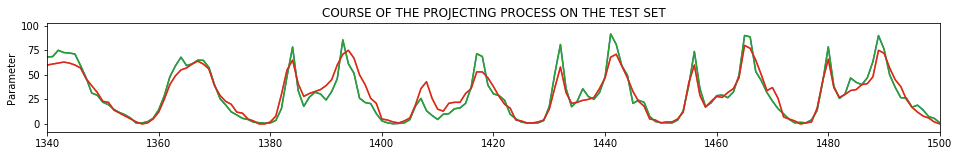

In [51]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_pred']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(1340, 1500)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

<Figure size 432x288 with 0 Axes>

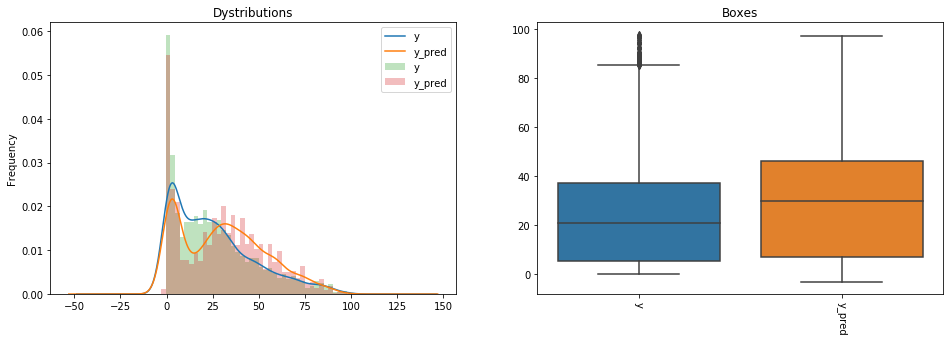

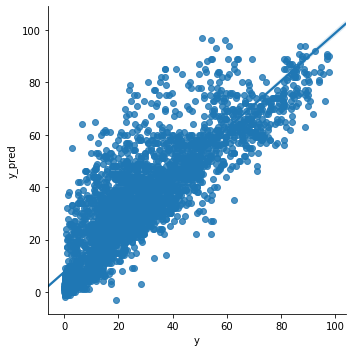

In [52]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_pred')
NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=NOWA, x='y', y='y_pred')

# Regression_Assessment

In [53]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_pred)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(y-y_pred))/y
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0: the sum of the model residuals is zero')
        print('OKAY! Model remains do not differ from zero - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue0) 
    else:     
        print('Bad - Model remains DIFFERENT FROM ZERO - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y have normal distribution?--------------------------------')
        print('OK Shapiro-Wolf! y have normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue2_1) 
    else:     
        print('Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred have a normal distribution?--')
        print('OK Shapiro-Wolf! y_pred has a normal distribution - pvalue:% 0.4f> 0.01 (we do NOT reject h0)'% pvalue2_2) 
    else:     
        print('Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
        
    stat,pvalue3 = stats.kruskal(y_pred,y)
    stat,pvalue4 = stats.f_oneway(y_pred,y)

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Шапиро-Вилк: Переменные не имеют нормального распределения! Не могу сделать анализ ANOV')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: whether empirical forecast and observations. have equal means?')
            print('OKAY! Kruskal-Wallis H0: forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue3) 
        else:     
            print('Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue3)  
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): whether empirical forecast and observations. have equal means?--------------------------------')
            print('OKAY! forecast and observations empir. have equal means - pvalue:% 0.4f> 0.01 (we do NOT reject H0)'% pvalue4) 
        else:     
            print('Bad - forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue:% 0.4f <0.01 (We reject H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

-----two methods--------------
r2_score:           0.682
r2_score:           0.682

-------------------------------
Mean absolute error     MAE:  8.31 
Root mean squared error RMSE: 12.48 
Mean absolute error     MAPE: 86.91 
-------------------------------
Bad - Model remains DIFFERENT FROM ZERO - pvalue: 0.0000 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue: 0.0000 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue: 0.0000 <0.01 (We reject H0)


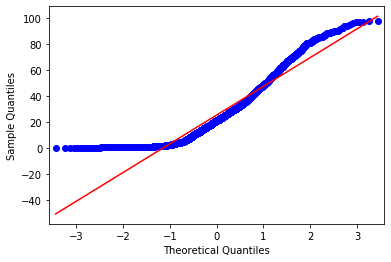

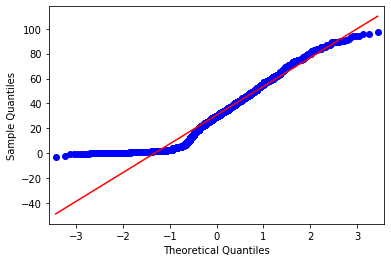

--------------------------------------------------------------------------------------------
Шапиро-Вилк: Переменные не имеют нормального распределения! Не могу сделать анализ ANOV
Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue: 0.0000 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------


In [54]:
y = NOWA['y']
y_pred = NOWA['y_pred']

Regression_Assessment(y, y_pred)

# Sprawdzenie na odłożonym miesiącu 12 miesiąc


In [55]:
print(X_SuperT.shape)
X_SuperT.head(3)

(86, 15)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,month,weekofyear
17293,17294,1,1,12,10,0,4,1,2,0.26,0.2424,0.56,0.2537,12,52
17294,17295,1,1,12,11,0,4,1,2,0.28,0.2727,0.52,0.2239,12,52
17295,17296,1,1,12,12,0,4,1,2,0.30,0.3030,0.49,0.1343,12,52


In [56]:
y_SuperT.head(3)

17293    162
17294    178
17295    222
Name: cnt, dtype: int64

Normalizacja 12- tego miesiąca

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_SuperT = sc.fit_transform(X_SuperT)

print(np.round(X_SuperT.std(), decimals=2), np.round(X_SuperT.mean(), decimals=2))

0.82 -0.0


In [58]:
X_SuperT = torch.tensor(X_SuperT)
X_SuperT = X_SuperT.type(torch.FloatTensor)
print(X_SuperT[:3])

tensor([[-1.7120,  0.0000,  0.0000,  0.0000, -0.3405,  0.0000,  0.1161,  1.1239,
          0.6165,  0.3527,  0.1062, -0.2904,  0.3681,  0.0000,  0.6222],
        [-1.6717,  0.0000,  0.0000,  0.0000, -0.1934,  0.0000,  0.1161,  1.1239,
          0.6165,  0.8419,  0.9404, -0.5800,  0.1717,  0.0000,  0.6222],
        [-1.6315,  0.0000,  0.0000,  0.0000, -0.0462,  0.0000,  0.1161,  1.1239,
          0.6165,  1.3312,  1.7746, -0.7971, -0.4189,  0.0000,  0.6222]])


In [59]:
y_SuperT = (y_SuperT / 100)  # max test score is 100
#print(y.head(3))
print(np.round(y_SuperT.std(), decimals=2), np.round(y_SuperT.mean(), decimals=2))

0.77 0.97


In [60]:
y_SuperT = y_SuperT.values
y_SuperT = torch.tensor(y_SuperT)
y_SuperT = y_SuperT.view(y_SuperT.shape[0],1)
y_SuperT.shape

torch.Size([86, 1])

In [61]:
print('X_SuperT:',X_SuperT.shape)
print('y_SuperT:',y_SuperT.shape)

X_SuperT: torch.Size([86, 15])
y_SuperT: torch.Size([86, 1])


bez sensu

In [62]:
with torch.no_grad():
    y_predST = net(X_SuperT)  
    loss = (y_predST - y_SuperT).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 203.51145955


In [63]:
y_predST = y_predST*100
foka = y_predST.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_predST']
df11=np.round(df11.y_predST)
df11.head(3)

0    103.0
1    109.0
2     91.0
Name: y_predST, dtype: float32

In [64]:
y_SuperT = y_SuperT*100
y_SuperT = np.round(y_SuperT)
foka = y_SuperT.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y_ST']
df_t.head(3)

,y_ST
0,162.0
1,178.0
2,222.0


In [65]:
Super_NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
Super_NOWA.head(3)

,y_ST,y_predST
0,162.0,103.0
1,178.0,109.0
2,222.0,91.0


Text(0.5, 1.0, 'COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

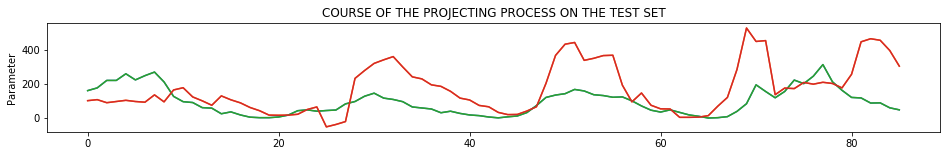

In [66]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y_ST', 'y_predST']:
    ax.plot(Super_NOWA, label=ewa)
    
#ax.set_xlim(1340, 1500)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

<Figure size 432x288 with 0 Axes>

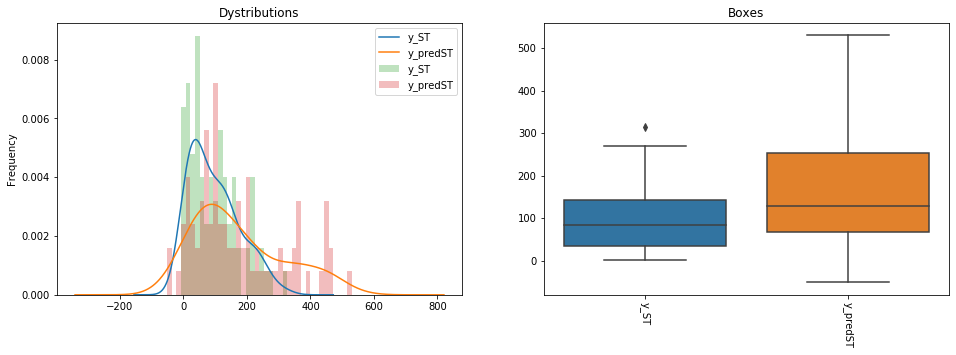

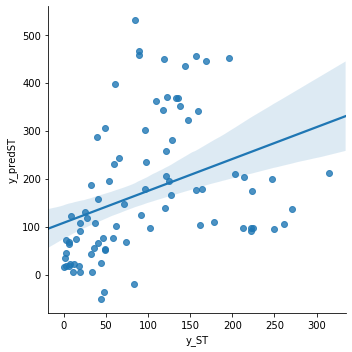

In [67]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
Super_NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_pred')
Super_NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = Super_NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=Super_NOWA, x='y_ST', y='y_predST')

-----two methods--------------
r2_score:           -3.020
r2_score:           -3.020

-------------------------------
Mean absolute error     MAE:  113.79 
Root mean squared error RMSE: 153.84 
Mean absolute error     MAPE: 259.52 
-------------------------------
Bad - Model remains DIFFERENT FROM ZERO - pvalue: 0.0000 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk - y NO NORMAL DISTRIBUTION - pvalue: 0.0001 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------
Bad Shapiro-Wilk y_pred NO NORMAL DISTRIBUTION - pvalue: 0.0001 <0.01 (We reject H0)


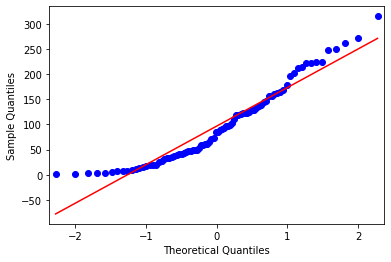

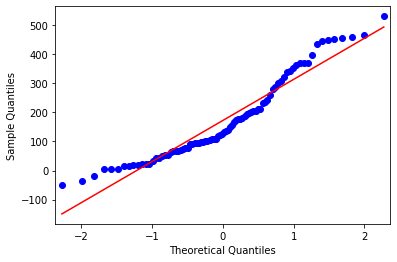

--------------------------------------------------------------------------------------------
Шапиро-Вилк: Переменные не имеют нормального распределения! Не могу сделать анализ ANOV
Bad - Kruskal-Wallis: forecast and observations empir. DO NOT HAVE EQUAL Averages - pvalue: 0.0005 <0.01 (We reject H0)
--------------------------------------------------------------------------------------------


In [68]:
y = Super_NOWA['y_ST']
y_pred = Super_NOWA['y_predST']

Regression_Assessment(y, y_pred)

# Вышло плохо - методы устранения явления перенапряжения должны быть реализованы!

## Mean absolute error MAE i RMSE
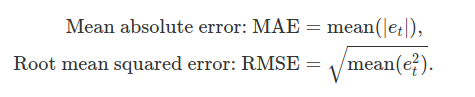

## Percentage errors MAPE



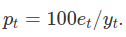